In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas_datareader as pdr
key="0d2742140da1186402077c574b6026778feb9993"

In [4]:
df = pdr.get_data_tiingo('TCS', api_key=key)

In [5]:
df.to_csv('TCS.csv')

In [6]:
df=pd.read_csv('TCS.csv')

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TCS,2016-11-17 00:00:00+00:00,5.93,6.140,5.9150,5.93,918248,5.579211,5.776789,5.565099,5.579211,918248,0.0,1.0
1,TCS,2016-11-18 00:00:00+00:00,5.87,6.000,5.8300,5.98,324879,5.522761,5.645070,5.485127,5.626254,324879,0.0,1.0
2,TCS,2016-11-21 00:00:00+00:00,6.02,6.119,5.8700,5.94,417373,5.663887,5.757031,5.522761,5.588620,417373,0.0,1.0
3,TCS,2016-11-22 00:00:00+00:00,5.90,6.100,5.8327,6.10,350153,5.550986,5.739155,5.487667,5.739155,350153,0.0,1.0
4,TCS,2016-11-23 00:00:00+00:00,6.01,6.090,5.9300,5.93,330494,5.654479,5.729746,5.579211,5.579211,330494,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,TCS,2021-11-09 00:00:00+00:00,13.61,13.975,13.3200,13.63,527947,13.610000,13.975000,13.320000,13.630000,527947,0.0,1.0
1253,TCS,2021-11-10 00:00:00+00:00,13.33,13.600,13.1600,13.52,515192,13.330000,13.600000,13.160000,13.520000,515192,0.0,1.0
1254,TCS,2021-11-11 00:00:00+00:00,13.18,13.420,13.0600,13.30,372359,13.180000,13.420000,13.060000,13.300000,372359,0.0,1.0
1255,TCS,2021-11-12 00:00:00+00:00,13.46,13.520,13.1600,13.18,312249,13.460000,13.520000,13.160000,13.180000,312249,0.0,1.0


In [8]:
df1=df.reset_index()['close']

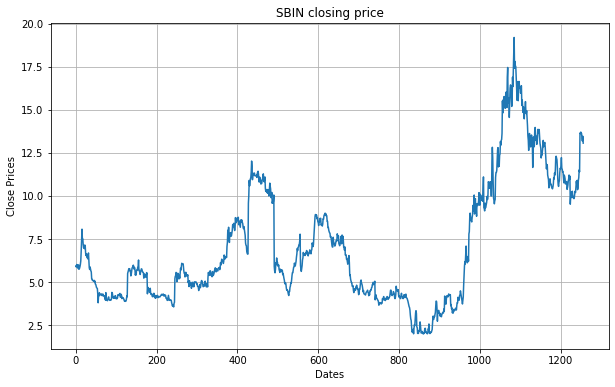

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['close'])
plt.title('SBIN closing price')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.22906977]
 [0.2255814 ]
 [0.23430233]
 ...
 [0.6505814 ]
 [0.66686047]
 [0.64360465]]


In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(817, 440)

In [14]:
train_data

array([[0.22906977],
       [0.2255814 ],
       [0.23430233],
       [0.22732558],
       [0.23372093],
       [0.22965116],
       [0.21976744],
       [0.23255814],
       [0.21860465],
       [0.22209302],
       [0.22732558],
       [0.23488372],
       [0.24651163],
       [0.27906977],
       [0.32093023],
       [0.35348837],
       [0.31918605],
       [0.32034884],
       [0.30116279],
       [0.29069767],
       [0.29825581],
       [0.2877907 ],
       [0.3       ],
       [0.29651163],
       [0.27267442],
       [0.26453488],
       [0.26976744],
       [0.25930233],
       [0.26395349],
       [0.25348837],
       [0.26162791],
       [0.27325581],
       [0.25      ],
       [0.22325581],
       [0.21744186],
       [0.22616279],
       [0.21918605],
       [0.2127907 ],
       [0.20930233],
       [0.18546512],
       [0.18488372],
       [0.18023256],
       [0.18023256],
       [0.17965116],
       [0.17848837],
       [0.18081395],
       [0.1755814 ],
       [0.178

In [15]:
test_data

array([[1.34302326e-01],
       [1.22674419e-01],
       [1.21511628e-01],
       [1.19767442e-01],
       [1.15116279e-01],
       [1.10465116e-01],
       [1.04069767e-01],
       [9.59302326e-02],
       [9.18604651e-02],
       [8.89534884e-02],
       [8.02325581e-02],
       [6.27906977e-02],
       [5.05813953e-02],
       [4.59302326e-02],
       [2.44186047e-02],
       [6.97674419e-03],
       [8.72093023e-03],
       [5.81395349e-03],
       [1.56976744e-02],
       [5.81395349e-04],
       [1.91860465e-02],
       [3.13953488e-02],
       [2.79069767e-02],
       [5.00000000e-02],
       [7.15116279e-02],
       [7.84883721e-02],
       [6.91860465e-02],
       [2.38372093e-02],
       [2.15116279e-02],
       [1.74418605e-03],
       [7.55813953e-03],
       [1.74418605e-03],
       [1.10465116e-02],
       [8.72093023e-03],
       [1.80232558e-02],
       [4.06976744e-02],
       [2.96511628e-02],
       [1.22093023e-02],
       [2.90697674e-03],
       [5.23255814e-03],


In [16]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 9s 303ms/step - loss: 0.0197 - val_loss: 0.0582
Epoch 2/50
12/12 [==============================] - 2s 187ms/step - loss: 0.0052 - val_loss: 0.0149
Epoch 3/50
12/12 [==============================] - 2s 188ms/step - loss: 0.0034 - val_loss: 0.0068
Epoch 4/50
12/12 [==============================] - 2s 187ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 5/50
12/12 [==============================] - 2s 185ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 6/50
12/12 [==============================] - 2s 186ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 7/50
12/12 [==============================] - 2s 184ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 8/50
12/12 [==============================] - 2s 184ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 9/50
12/12 [==============================] - 2s 183ms/step - loss: 0.0018 - val_loss: 0.0042
Epoch 10/50
12/12 [==============================] - 2s 183ms/step - loss: 0.0016 - val_loss: 0.0074

In [25]:
import tensorflow as tf

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6.346257493569863

In [29]:
math.sqrt(mean_squared_error(ytest,test_predict))

10.892929561559157

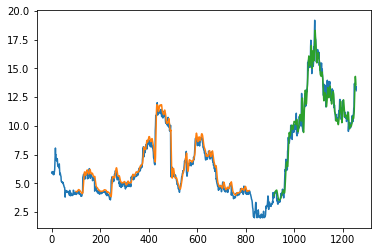

In [30]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()